# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
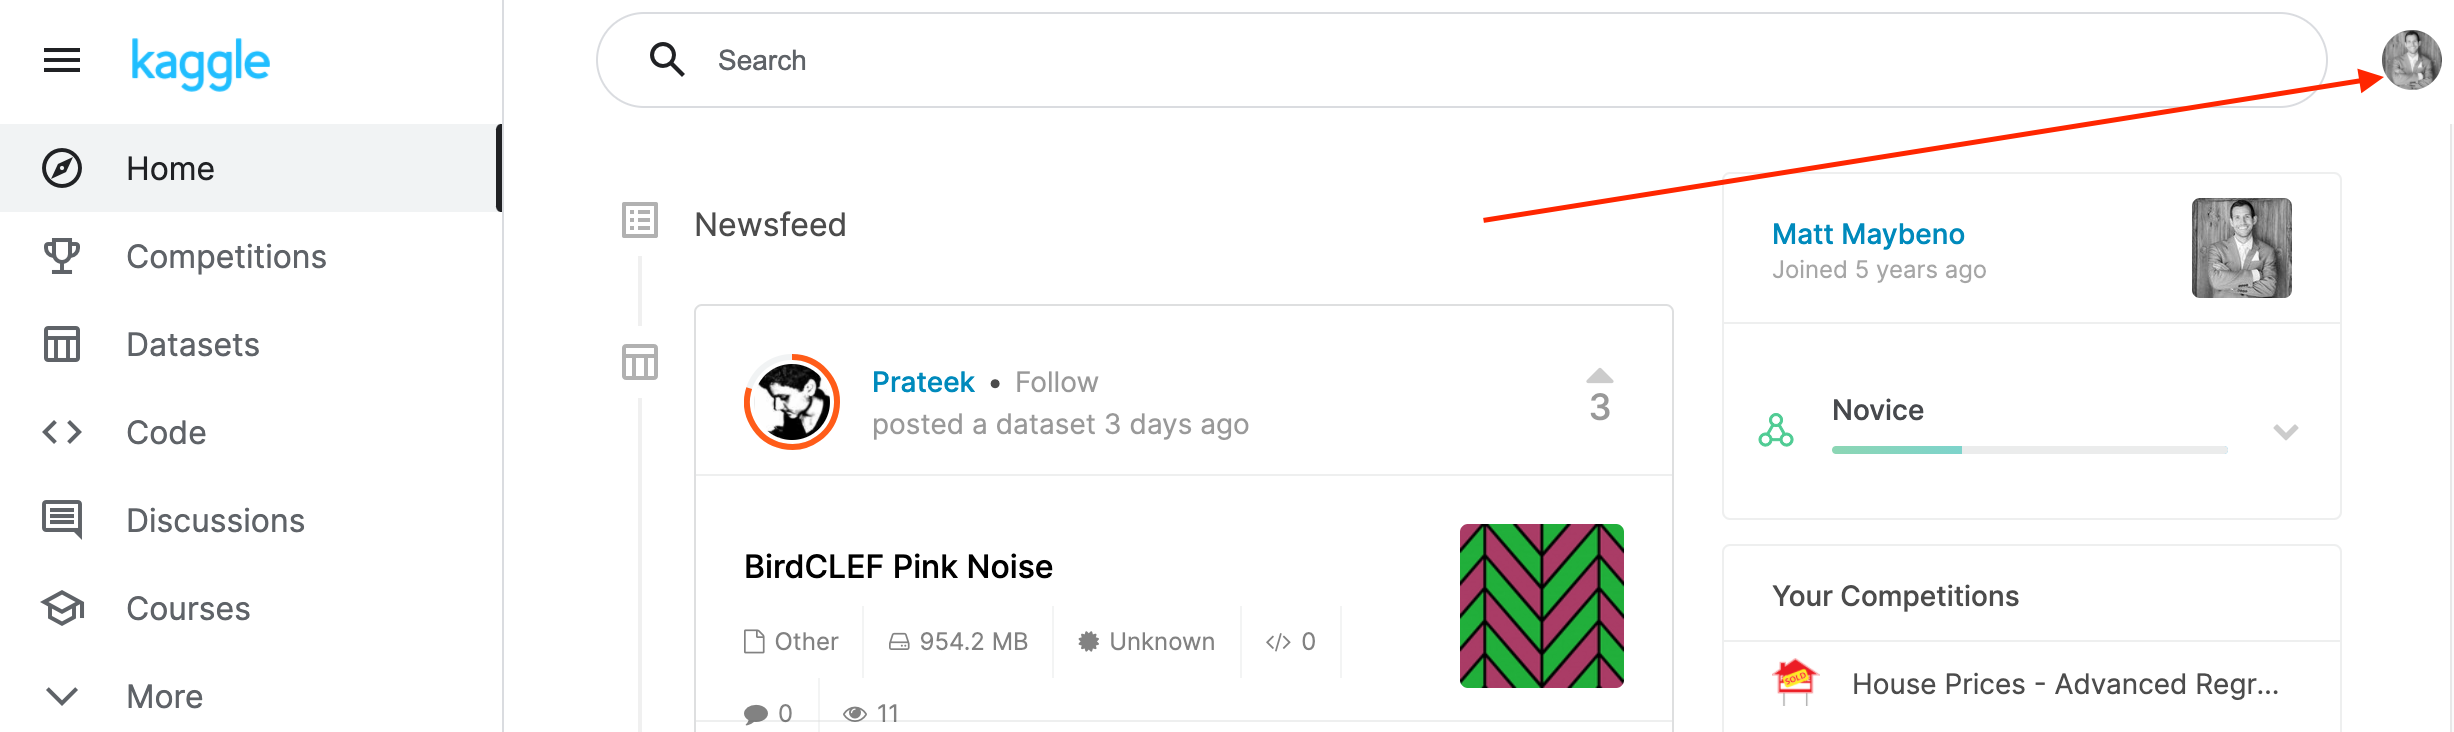
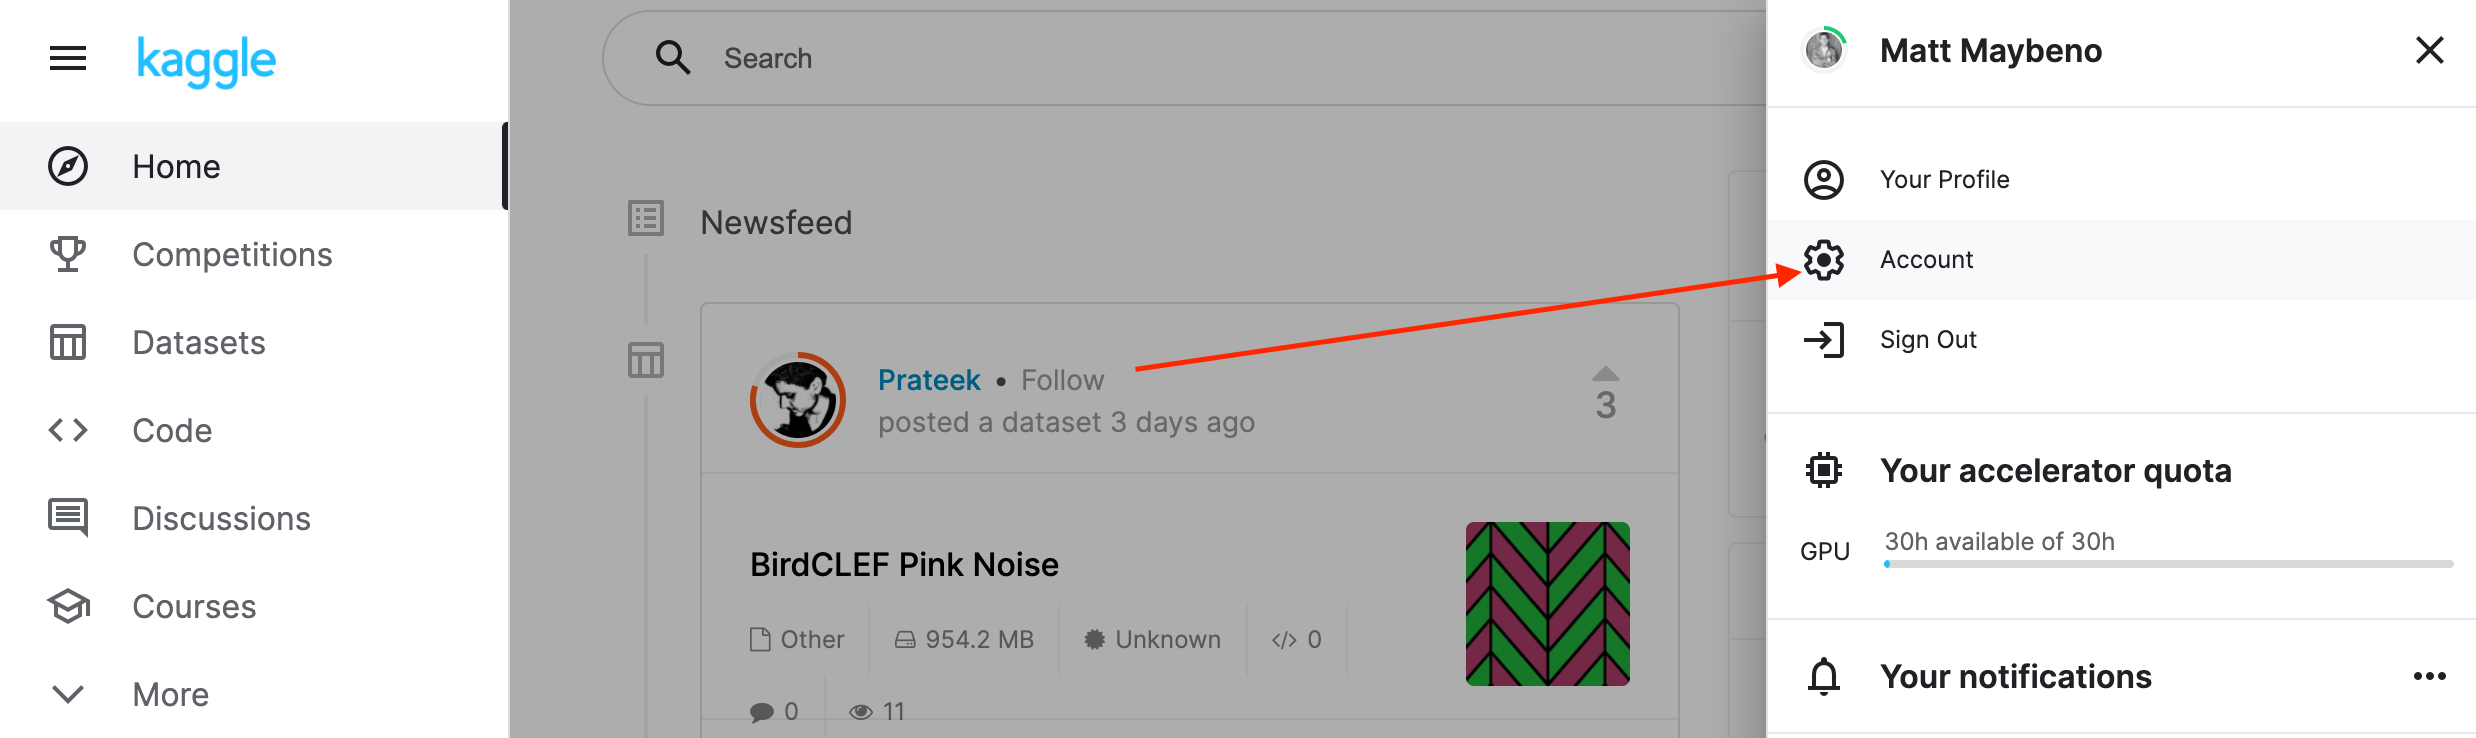
2. Scroll down to API and click Create New API Token.
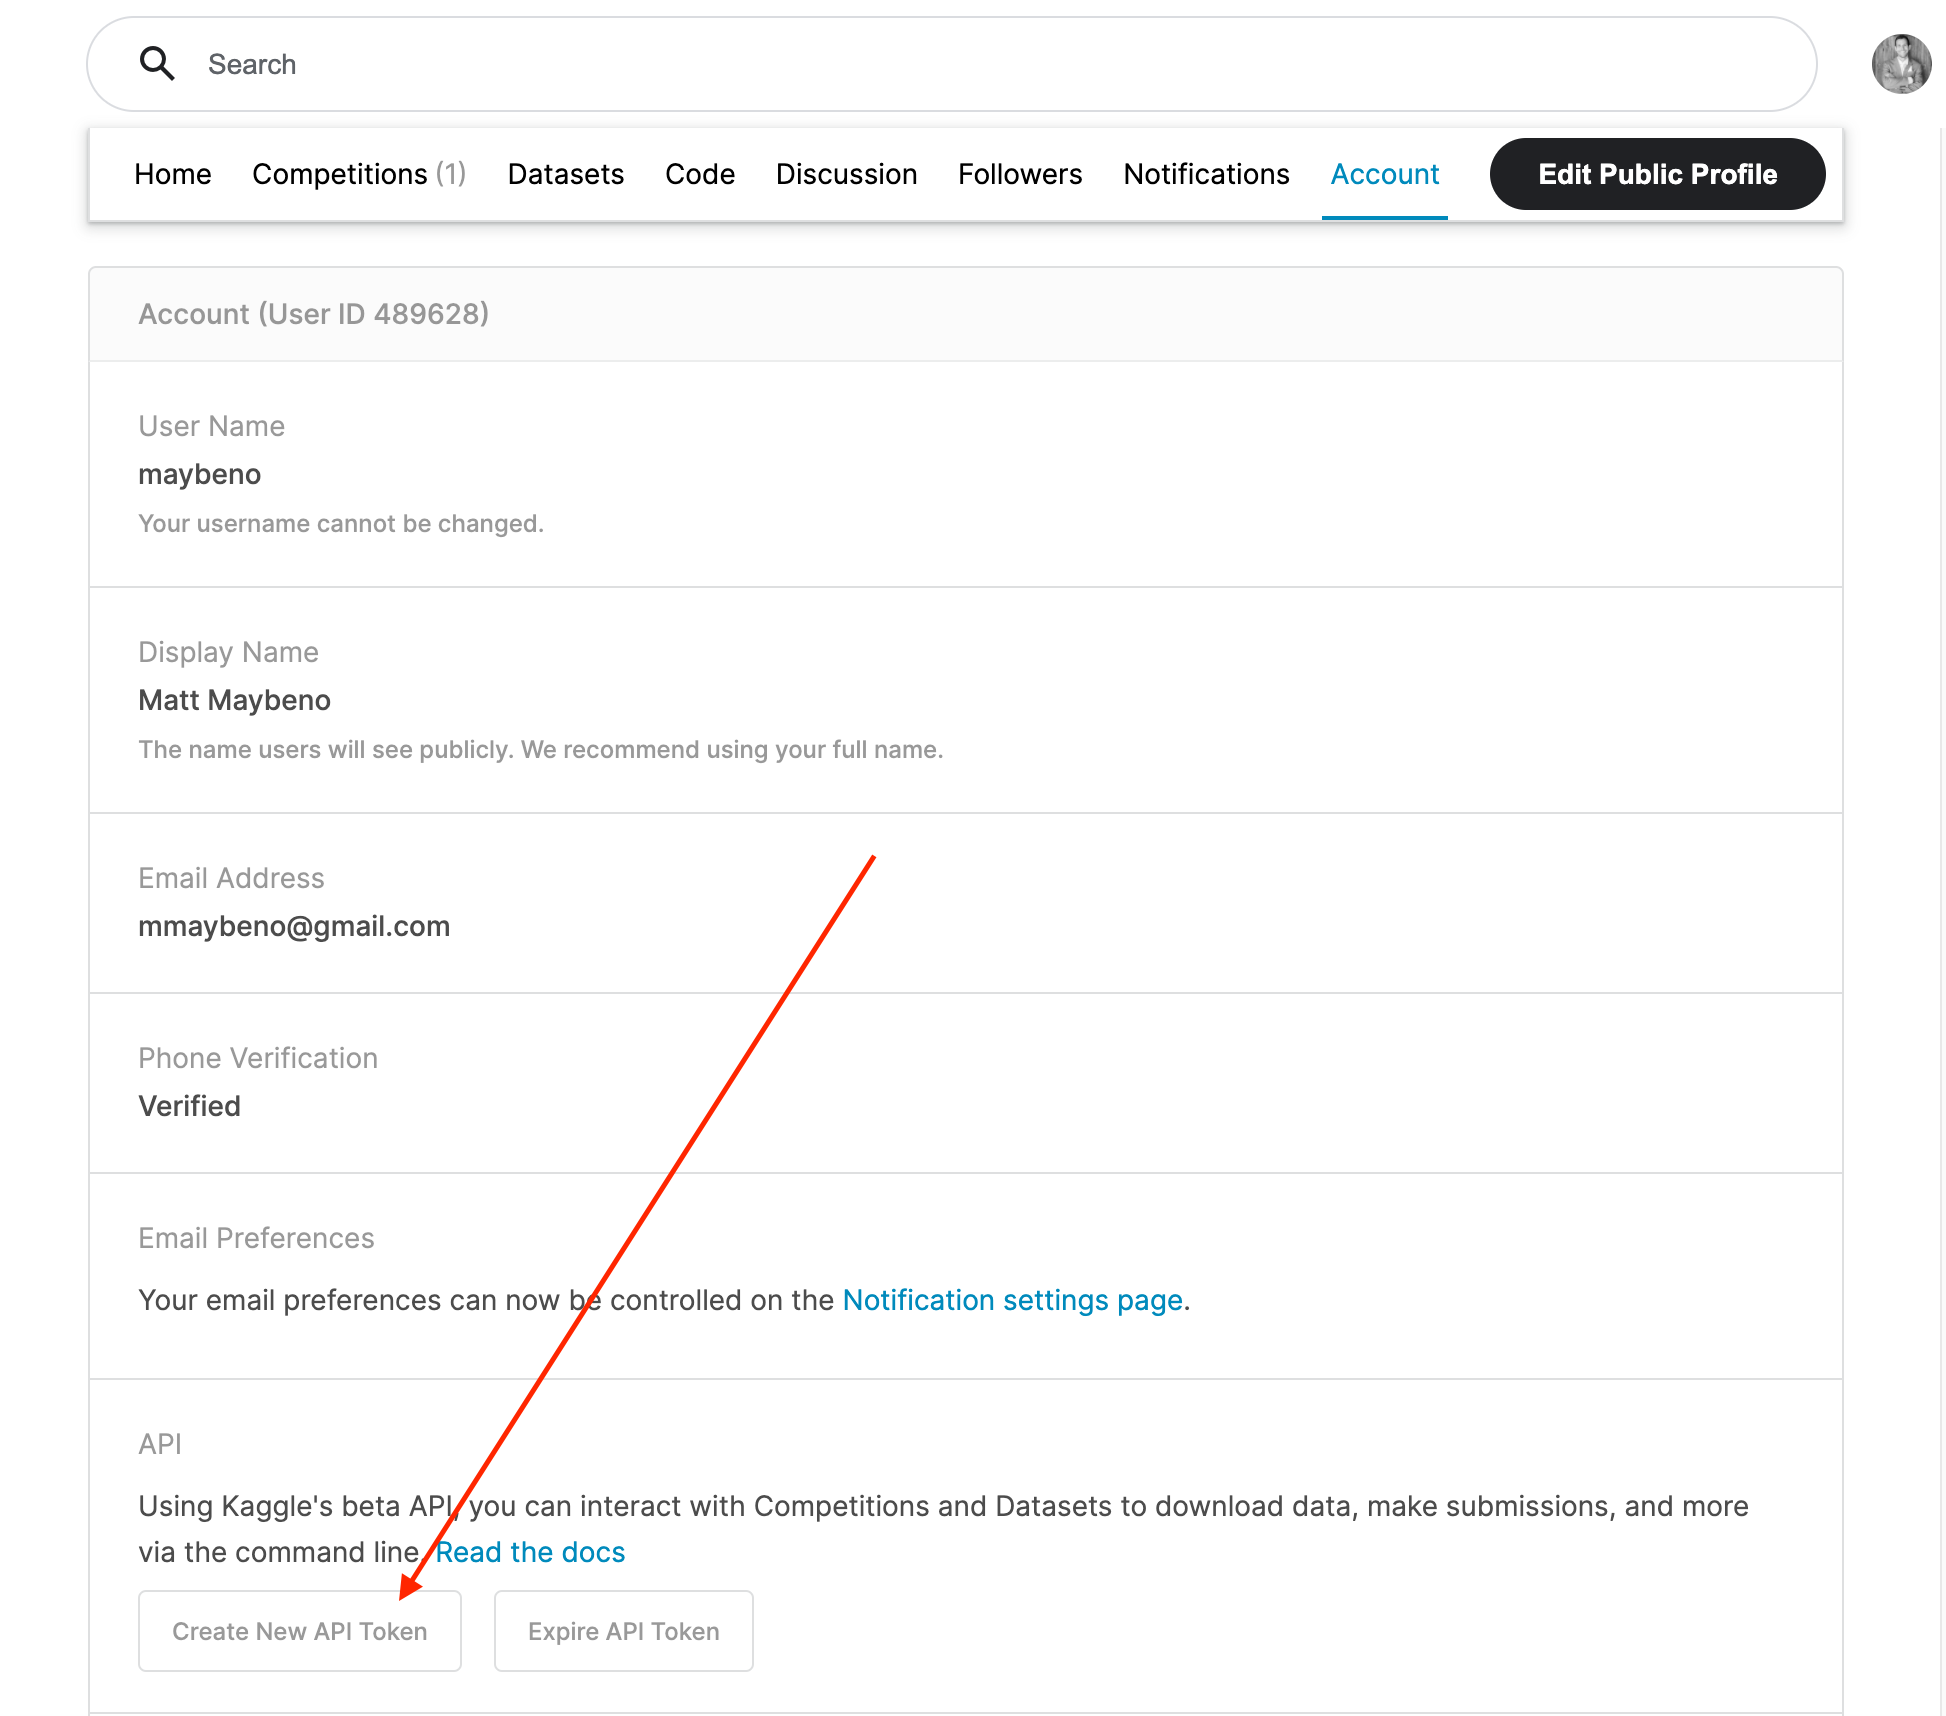
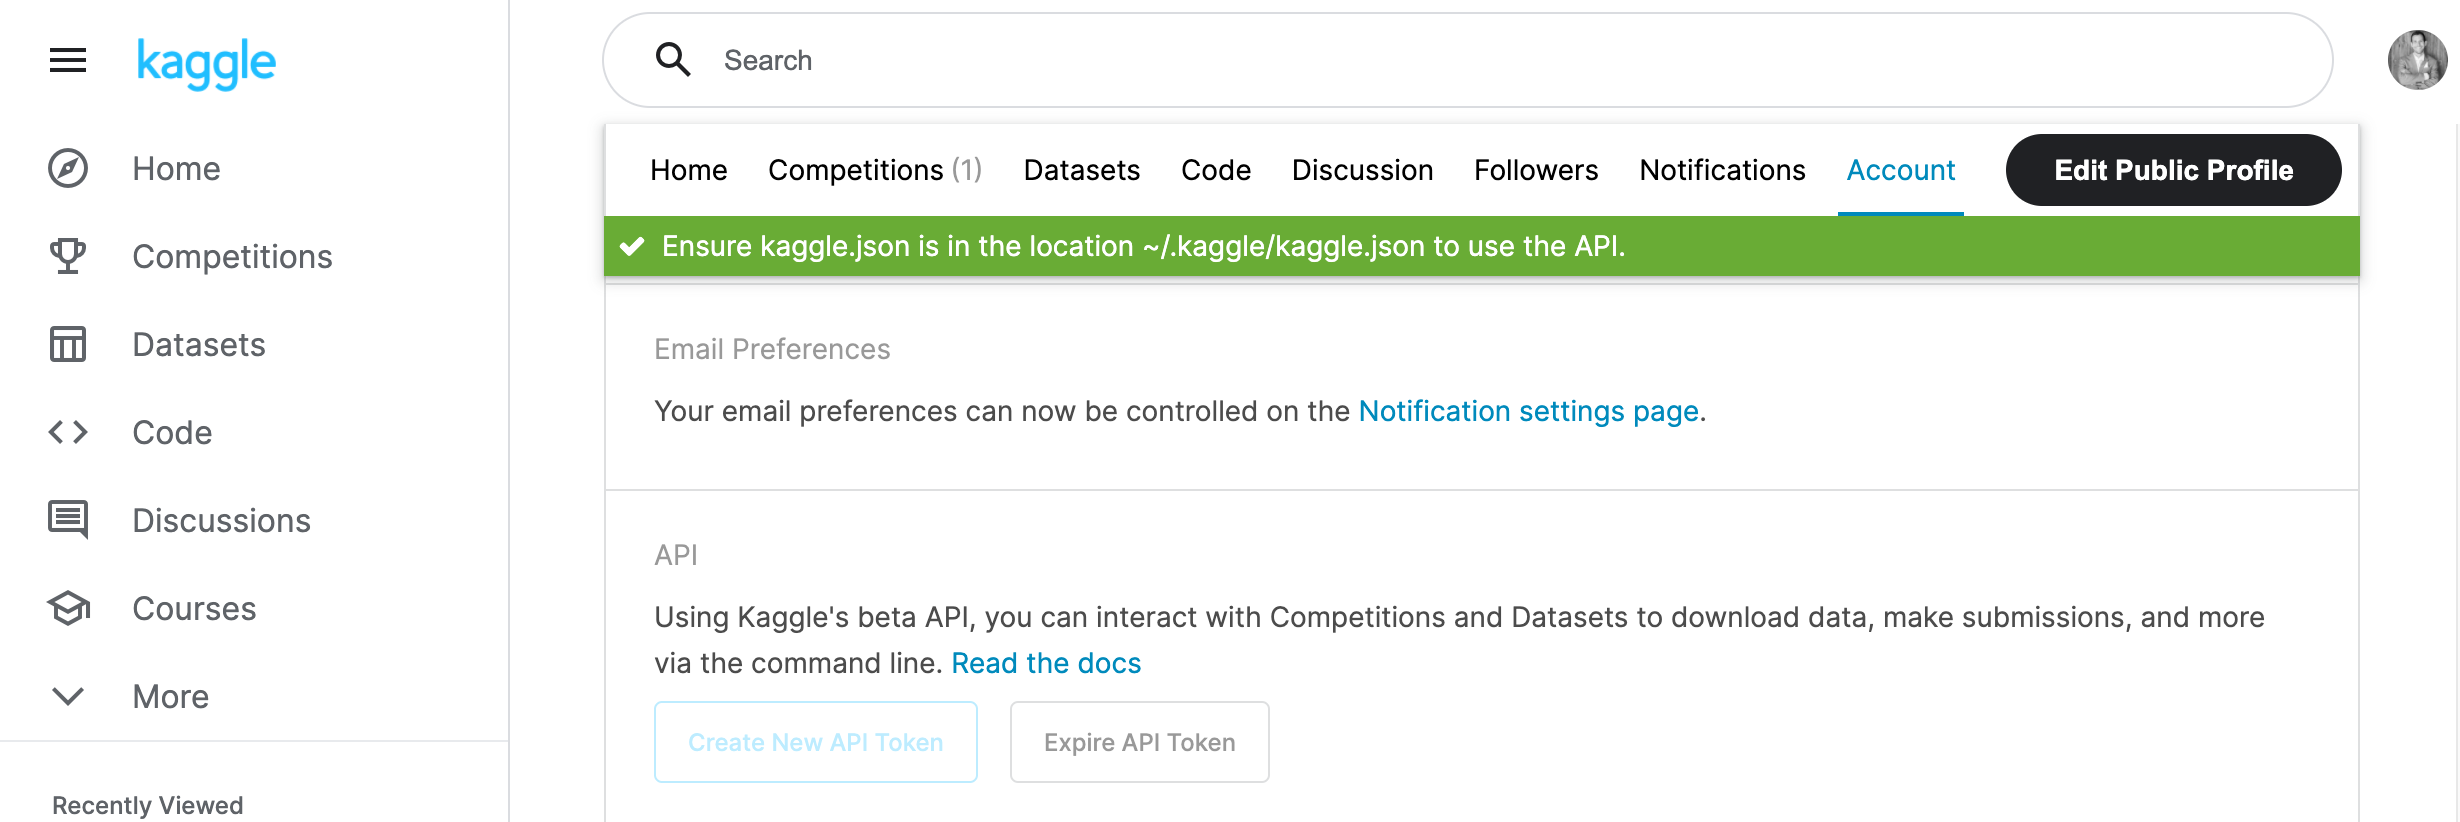
3. Open up `kaggle.json` and use the username and key.
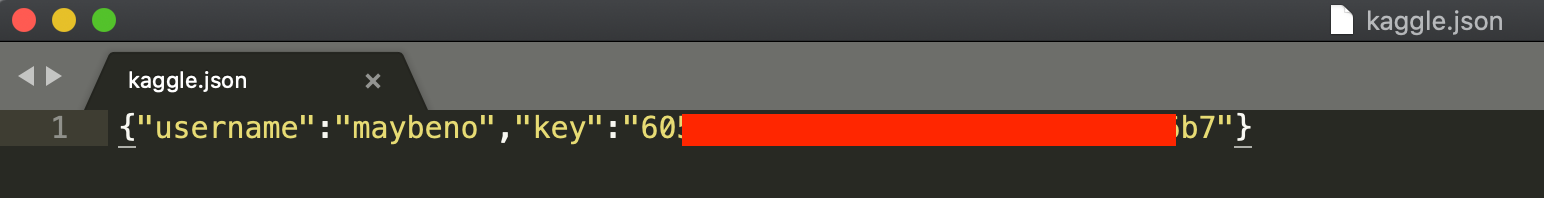

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 16.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.2.0
    Uninstalling setuptools-69.2.0:
      Successfully uninstalled setuptools-69.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.16.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.16.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.16.1 requires dash-table==5.0.0, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ..

### Setup Kaggle API Key

In [6]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory '/home/studio-lab-user/.kaggle': File exists


In [1]:
import os
from pathlib import Path

# Get the home directory path
home_dir = str(Path.home())

# Define the path to the kaggle.json file
kaggle_json_path = os.path.join(home_dir, ".kaggle", "kaggle.json")

import json
kaggle_username = "cvanisa"
kaggle_key = "4a77384798de28d1f3c1c5544119d1a4"

# Save API token to the kaggle.json file
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
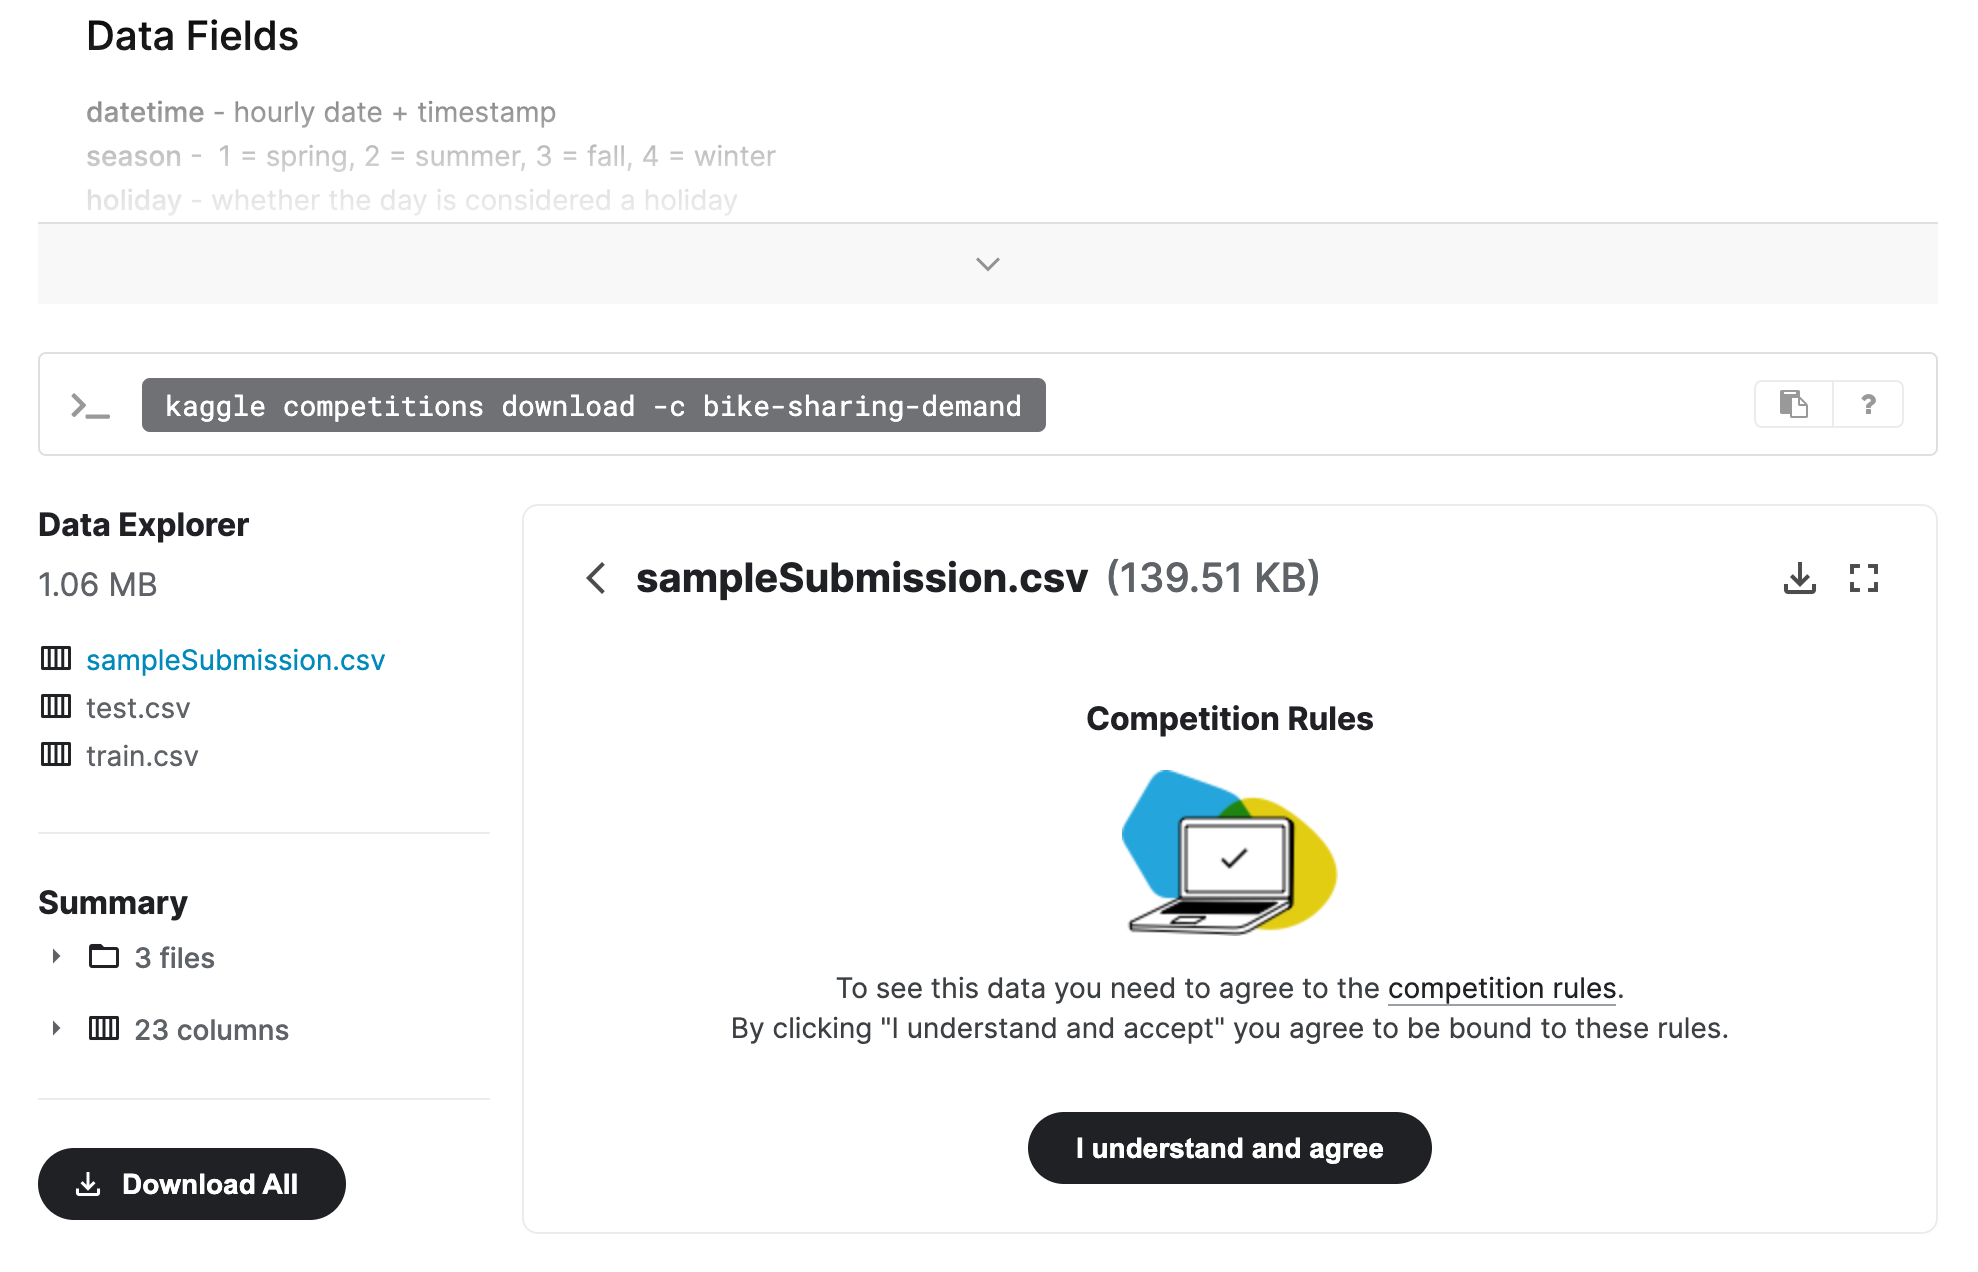

In [2]:
!pip install kaggle

  Using cached kaggle-1.6.12-py3-none-any.whl


In [19]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 3.42MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [3]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [9]:
# Initialize the TabularPredictor
predictor = TabularPredictor(label='count', 
                             problem_type= 'regression', 
                             eval_metric= 'root_mean_squared_error', 
                             learner_kwargs={'ignored_columns': ['casual','registered']}).fit(
                                                                           train_data = train,
                                                                           time_limit= 600,
                                                                           presets='best_quality',)

No path specified. Models will be saved in: "AutogluonModels/ag-20240510_112719"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240510_112719"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   23.73 GB / 26.83 GB (88.5%)
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Gener

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	30.43s	 = Training   runtime
	2.44s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 363.71s of the 563.77s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	8.87s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 353.45s of the 553.51s of remaining time.
	-116.5484	 = Validation score   (-root_mean_squared_error)
	6.76s	 = Training   runtime
	0.53s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 345.75s of the 545.81s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6475.
	Ran out of time, early stopping on iteration 6660.
	Ran out of time, early stopping on iteration 6763.
	-130.4723	 = Validation score   (-root_mean_squared_error)
	224.76s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 120.82s of the 320.88s of remaining time.
	-124.6007	 = Validation score   (-root_mean_squared_error)
	3.26s	 = Training   r

[1000]	valid_set's rmse: 60.5654
[2000]	valid_set's rmse: 59.3872
[1000]	valid_set's rmse: 60.5648
[2000]	valid_set's rmse: 59.0968
[3000]	valid_set's rmse: 59.0804
[1000]	valid_set's rmse: 63.7515
[2000]	valid_set's rmse: 62.2936
[1000]	valid_set's rmse: 64.1166
[2000]	valid_set's rmse: 62.7586
[1000]	valid_set's rmse: 59.0265
[2000]	valid_set's rmse: 57.6825
[1000]	valid_set's rmse: 64.2962
[2000]	valid_set's rmse: 63.2095
[1000]	valid_set's rmse: 63.6178
[2000]	valid_set's rmse: 62.7717
[3000]	valid_set's rmse: 62.7593
[1000]	valid_set's rmse: 57.5859
[2000]	valid_set's rmse: 56.8962


	-60.4758	 = Validation score   (-root_mean_squared_error)
	27.78s	 = Training   runtime
	1.34s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 169.99s of the 169.97s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.2843	 = Validation score   (-root_mean_squared_error)
	6.91s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 162.79s of the 162.78s of remaining time.
	-53.3304	 = Validation score   (-root_mean_squared_error)
	21.42s	 = Training   runtime
	0.62s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 140.35s of the 140.34s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.6729	 = Validation score   (-root_mean_squared_error)
	66.49s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... 

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -51.218735       6.012745  478.653333                0.000695           0.281117            3       True         19
1   NeuralNetFastAI_BAG_L2  -52.609676       4.794256  451.142500                0.192441          62.632627            2       True         17
2   RandomForestMSE_BAG_L2  -53.330350       5.217625  409.930473                0.615810          21.420599            2       True         14
3     ExtraTreesMSE_BAG_L2  -53.908166       5.203798  394.318990                0.601983           5.809116            2       True         16
4           XGBoost_BAG_L2  -55.064881       4.664281  392.199962                0.062466           3.690088            2       True         18
5          LightGBM_BAG_L2  -55.284335       4.713930  395.419140         

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleMode

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)
predictions.head()

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/features/generators/fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)


0    26.259758
1    41.557945
2    46.132801
3    49.400322
4    51.804321
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.193520
std        88.637016
min         0.044357
25%        21.327477
50%        65.924484
75%       169.475708
max       352.167358
Name: count, dtype: float64

In [14]:
# How many negative values do we have?
negativevalues = (predictions.apply(lambda x: 1 if x<0 else 0) ==1).sum()
print(negativevalues)

0


In [15]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 401kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-05-10 11:54:44  first raw submission  complete  1.81113      1.81113       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [5]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

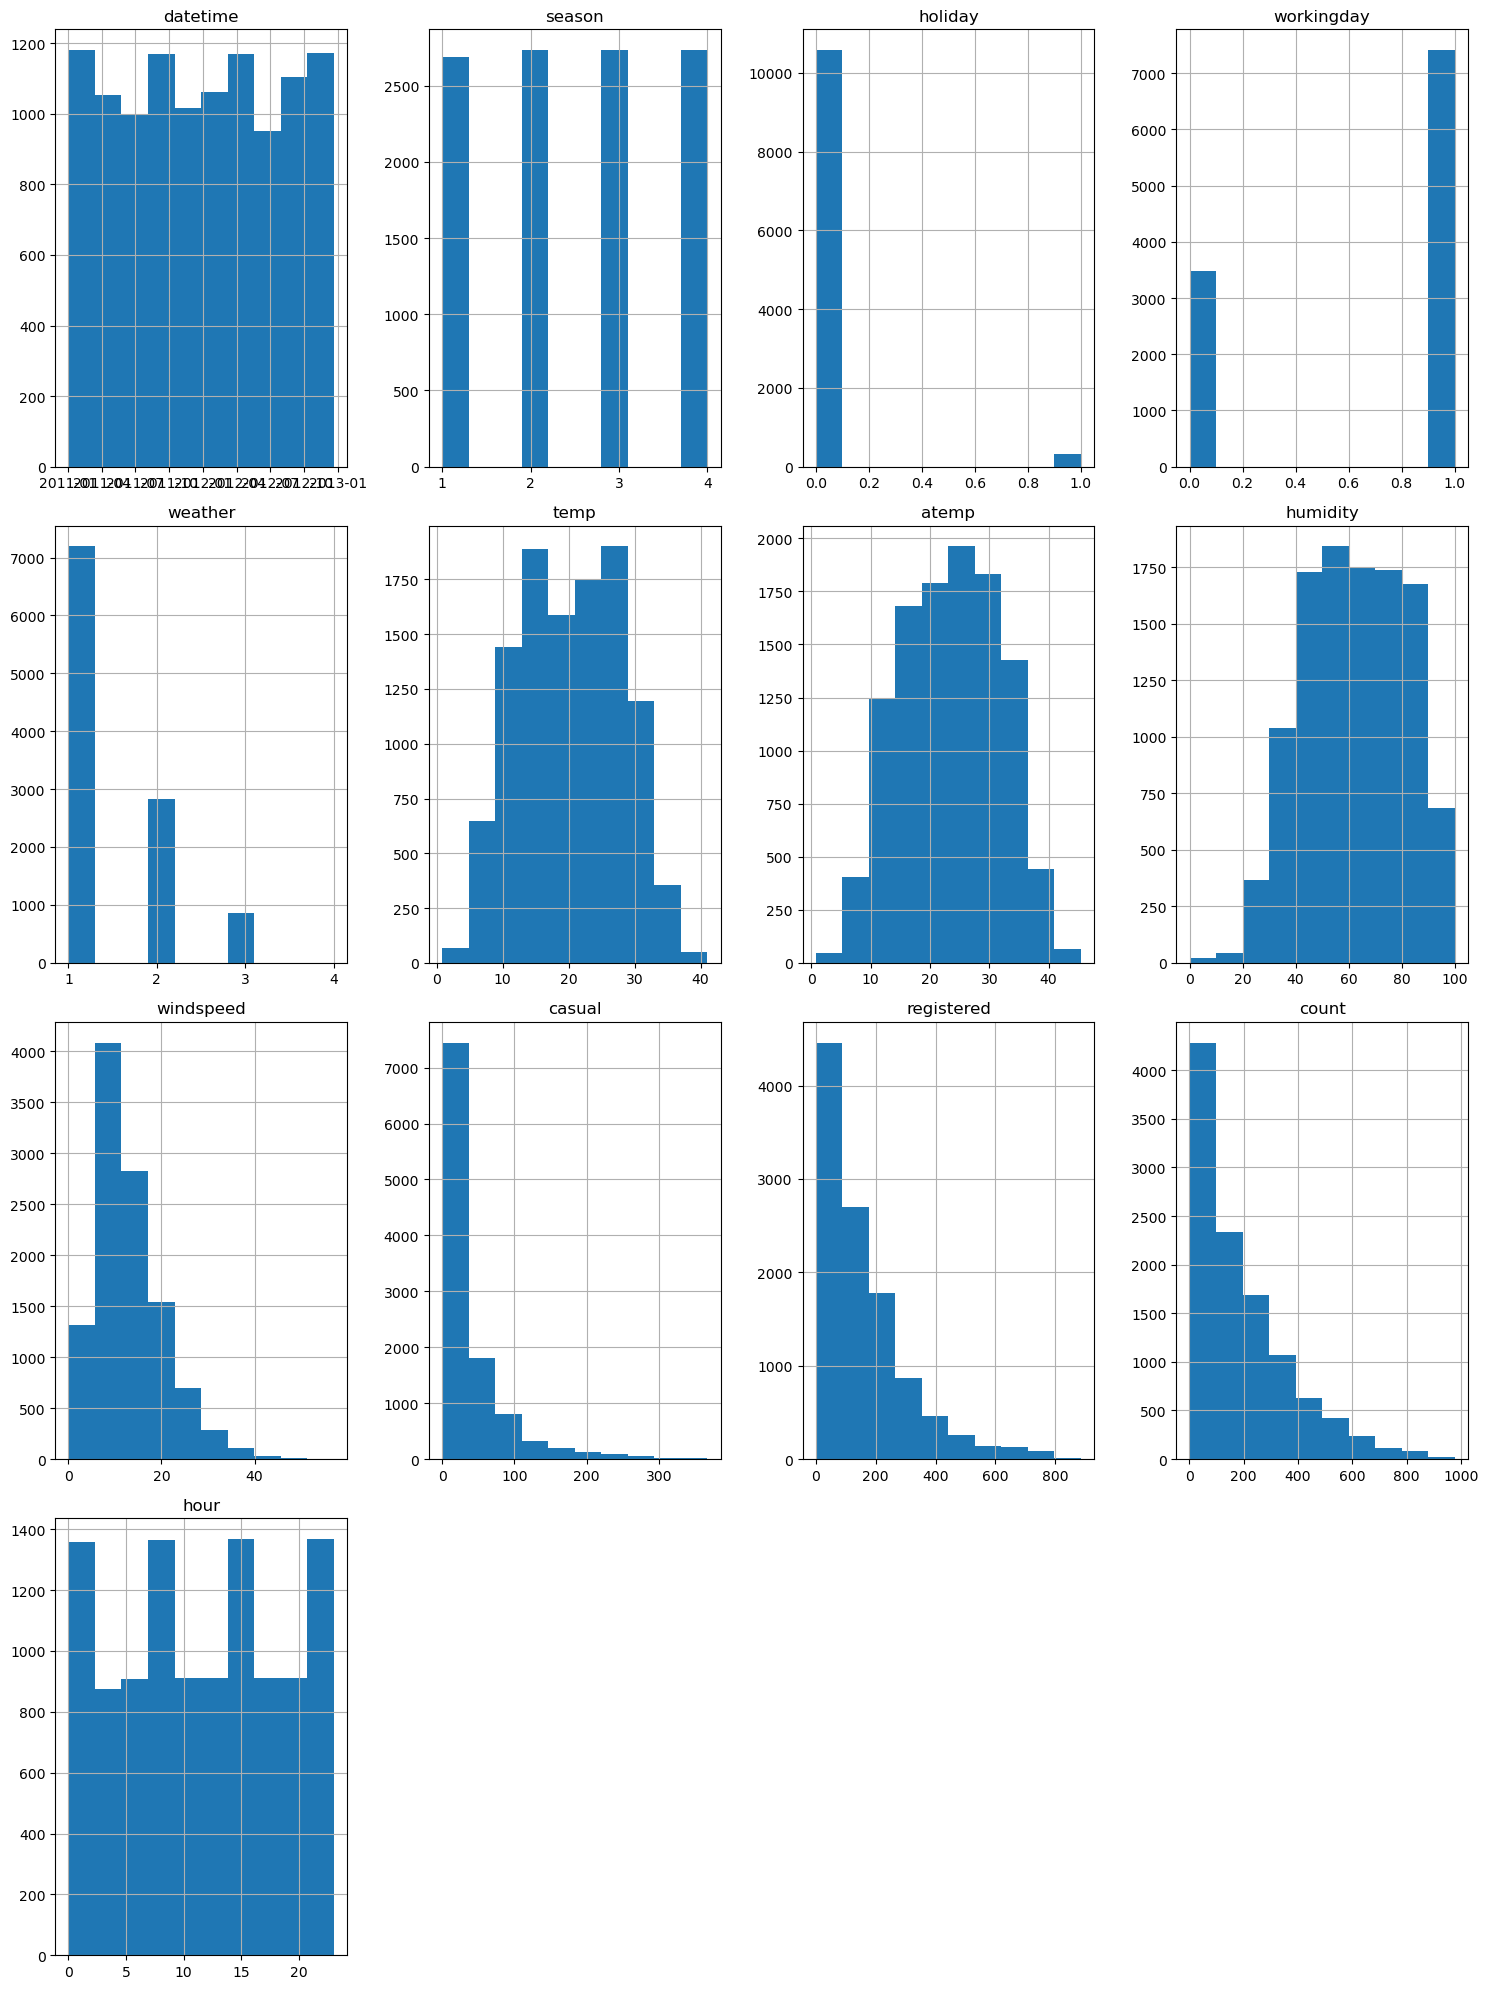

In [11]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(15,20))
plt.tight_layout()
plt.show()

#Season:
Bike rental counts vary significantly across different seasons, with the highest counts observed during the Spring season (encoded as 0) and the lowest during the Winter season (encoded as 3). This trend follows the expected pattern, as biking tends to be more popular in milder weather conditions.
Seasonal variations in bike rental counts highlight the importance of considering weather patterns and climate when predicting demand for bike sharing services.

#Holiday and Working Day:
The predictors holiday and workingday are binary-encoded columns (0 for non-holiday, 1 for holiday; 0 for non-working day, 1 for working day). Higher rental counts are observed during non-holidays and working days, indicating that bike rentals are more common on regular business days.
Understanding the influence of holidays and working days on bike rental demand will inform resource allocation and marketing strategies for bike sharing systems.

#Datetime:
The datetime feature exhibits a random distribution in the histogram plot, representing the timestamps of bike rental data. This randomness suggests that bike rental activity occurs sporadically throughout the dataset period, with no apparent temporal patterns.
While the datetime feature may not exhibit clear trends, its inclusion in predictive models can capture temporal dependencies and seasonality in bike rental demand.

#Temperature, "Feels Like" Temperature, Humidity, and Windspeed:
Predictor features such as temp, atemp, humidity, and windspeed display normal distribution patterns in their histogram plots. However, windspeed shows a slightly positively skewed distribution, indicating a higher frequency of lower windspeed values.
Normal distribution patterns in temperature and humidity suggest typical weather conditions, while the slightly skewed distribution of windspeed may reflect prevailing wind patterns in the dataset region.


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [8]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category") 

In [9]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

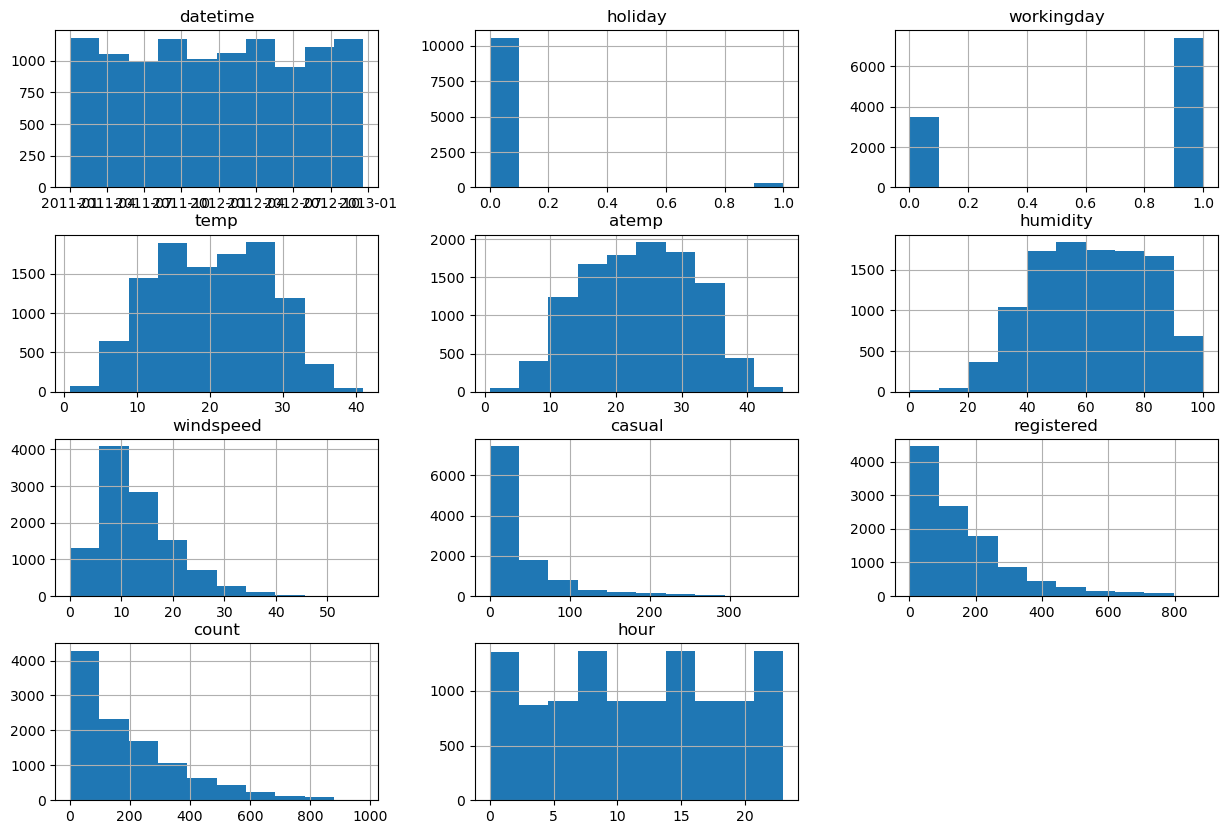

In [31]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))

In [14]:
!pip install seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


<Figure size 1800x1800 with 0 Axes>

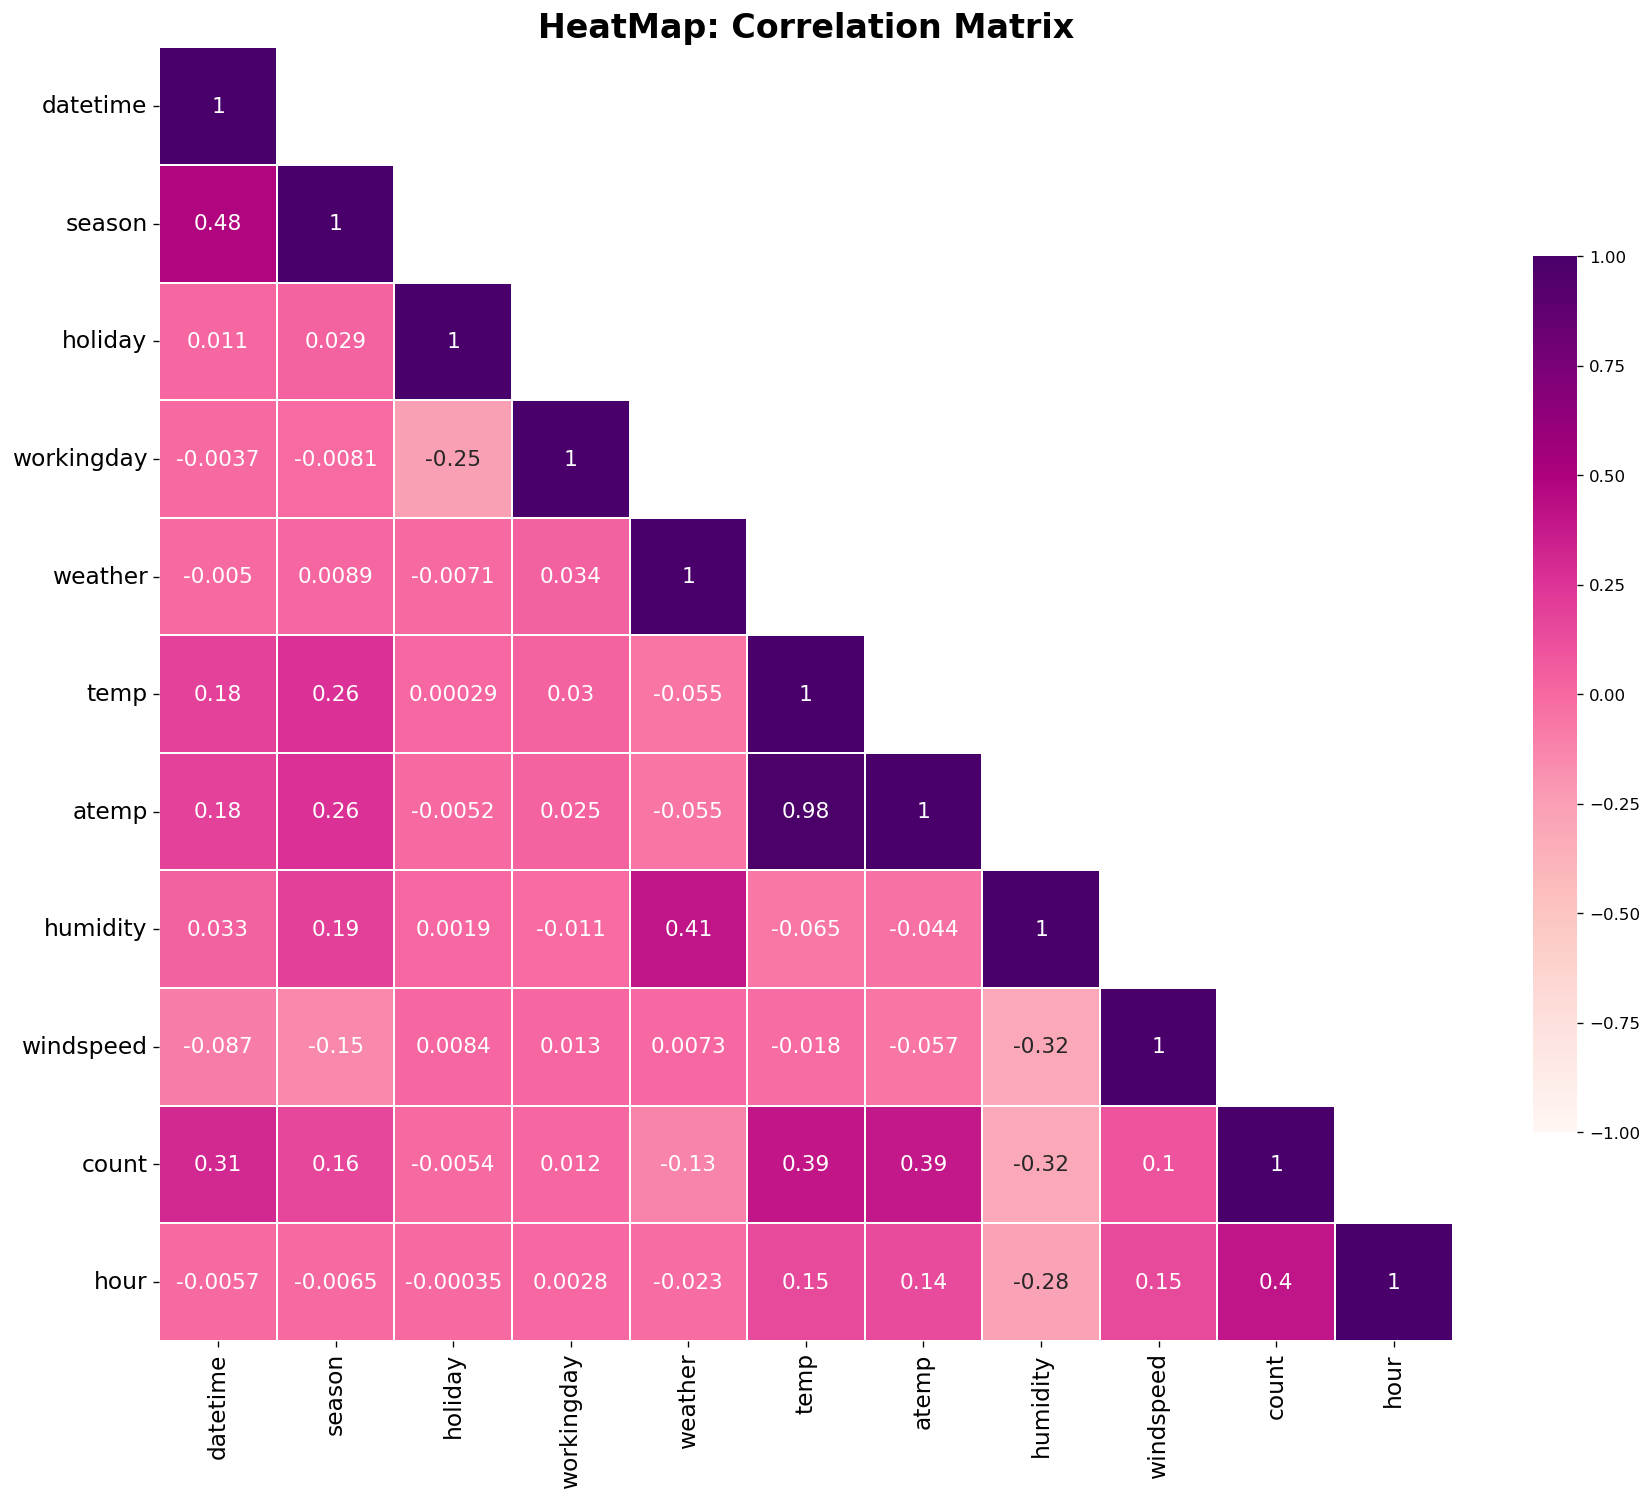

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
feature_numeric = [i for i in train.columns if i not in ['casual', 'registered']]
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()
corr_matrix = corr_data[feature_numeric].corr()

f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

Observations on Bike Rental Factors:

Temperature and "Feels Like" Temperature:

Real-time temperature (temp) and perceived temperature (atemp) exhibit a strong positive correlation of 0.98. This suggests that they are closely related and likely provide redundant information in predictive models.
While highly correlated, both temperature features collectively influence bike rental counts, indicating that weather conditions play a significant role in determining demand for bike rentals. Warmer temperatures generally encourage outdoor activities, including biking, while colder temperatures may deter users.

Casual and Registered Users

The variables casual and registered are highly correlated with the target variable count, but they are omitted during training since they are not present in the test data. These variables likely represent different user segments, such as occasional users (casual) and regular subscribers (registered), both of which contribute to overall bike rental counts.
Although excluded from the model, understanding the composition of bike rental users is essential for market segmentation and tailored marketing strategies.

Holiday and Working Day:

Holiday and working day indicators show the least correlation with bike rental counts. This suggests that while these factors may influence rental behavior to some extent, they are not as strong determinants as other variables.
The impact of holidays and working days on bike rental demand may vary depending on cultural norms, local events, and the availability of alternative transportation options.

Weather and Humidity:

Weather conditions and humidity are slightly negatively correlated with the decision to rent bikes, which aligns with intuition. Adverse weather conditions such as rain or high humidity may deter individuals from choosing biking as a mode of transportation.
My add ons: Understanding the impact of weather on bike rental decisions can inform operational decisions such as adjusting inventory levels during inclement weather or offering promotions during favorable conditions to incentivize usage.

In [35]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [10]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,5


In [11]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  
test["hour"] = test["datetime"].dt.hour
#drops the date time feature
test.drop(["datetime"], axis=1, inplace=True)  
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,month,day
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,1,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,1,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,1,3


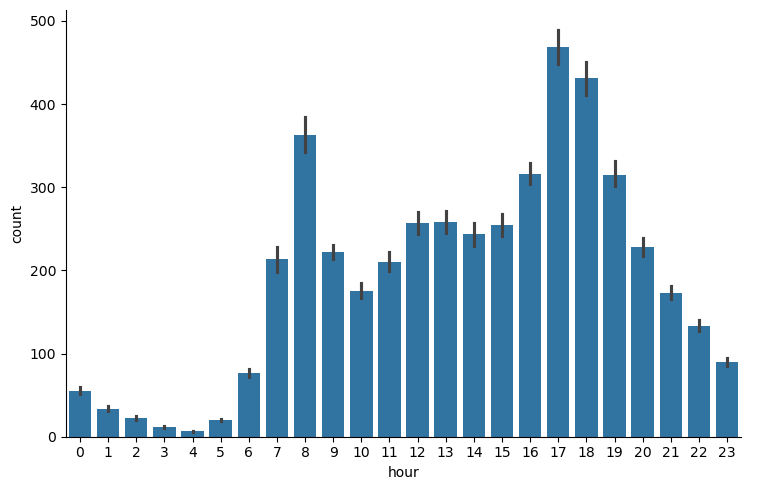

In [15]:
# I AM USING SEABORN TO FIND OUT HOW AN HOUR IMPACTS BIKE HIRING
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.tight_layout()
plt.show()

Peak Hours:

High demand is observed during the morning rush hours, specifically from 7am to 9am, and during the evening rush hours from 4pm to 7pm. This coincides with typical commuting times for working professionals and students, suggesting that bikes are being utilized as a mode of transportation to get to work or school.
The convenience and cost-effectiveness of bike rentals during peak hours make them an attractive option for short-distance commuting, especially in urban areas where traffic congestion is common.

Moderate Hours:

Moderate demand is seen during the midday hours, from 10am to 3pm. While not as high as peak hours, this indicates that bikes are still being utilized for various purposes such as running errands, lunchtime commutes, or recreational rides.
The availability of bikes during these hours provides flexibility for users who may need to travel during non-peak times or engage in leisure activities.

Off-Peak Hours:

Demand decreases significantly during the late night and early morning hours, from 12am to 6am, and from 8pm to 12am. This suggests that bike rentals are less common during these times, possibly due to reduced commuting needs or safety concerns.
While demand is lower during off-peak hours, ensuring the availability of bikes for late-night commuters or shift workers may still be important for providing equitable transportation options.

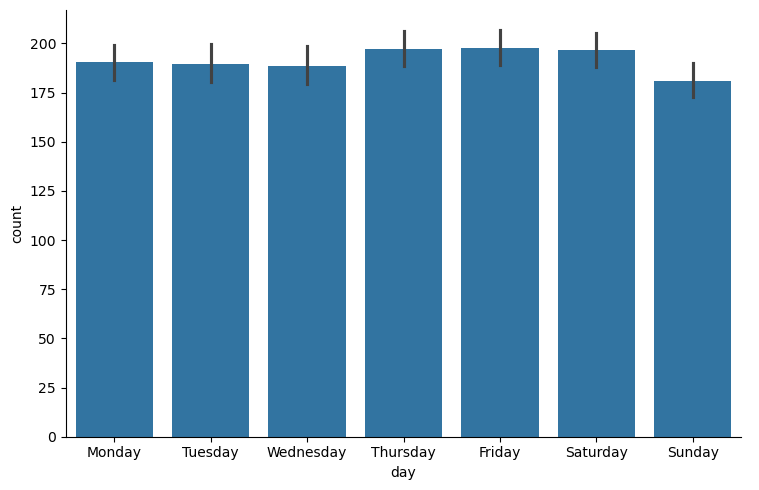

In [16]:
#does day of the week affect bike demand?
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday", 
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

Observations on Bike Rental Counts with Respect to Day of the Week:

Day of the Week:

There is not much variation or discernible pattern in bike rental counts across different days of the week.
However, slightly higher demand for bike rentals is observed on Thursdays, Fridays, and Saturdays compared to other days.
Though overall demand may not vary significantly day-to-day, the increased demand on Thursdays, Fridays, and Saturdays suggests potential trends related to weekend activities or end-of-week commuting patterns. These subtle variations can help optimize bike sharing system operations and marketing efforts to meet user demand more effectively, especially during peak periods.

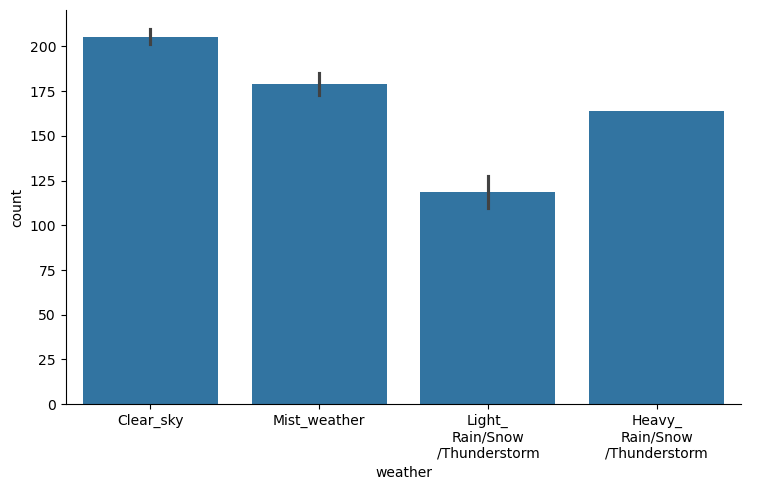

In [17]:
sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.xticks(ticks=range(0,4), labels=["Clear_sky","Mist_weather", 
                                     "Light_\nRain/Snow\n/Thunderstorm", 
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()

Observations on Bike Rental Counts by Weather Condition:

Weather Condition

Bike rental counts are highest during clear weather conditions, indicating a strong preference for biking when the weather is sunny and pleasant.
Following clear weather, the next highest rental counts are observed during misty conditions. While not as favorable as clear weather, misty conditions may still be perceived as relatively comfortable for outdoor activities like biking.
The preference for biking during clear weather aligns with expectations, as sunny conditions provide optimal visibility and comfort for outdoor activities. Misty weather, while not ideal, may still attract riders who are willing to tolerate slightly less favorable conditions for biking. Understanding the relationship between weather conditions and bike rental counts can inform operational decisions and marketing strategies to capitalize on favorable weather patterns and encourage bike usage during less optimal conditions.

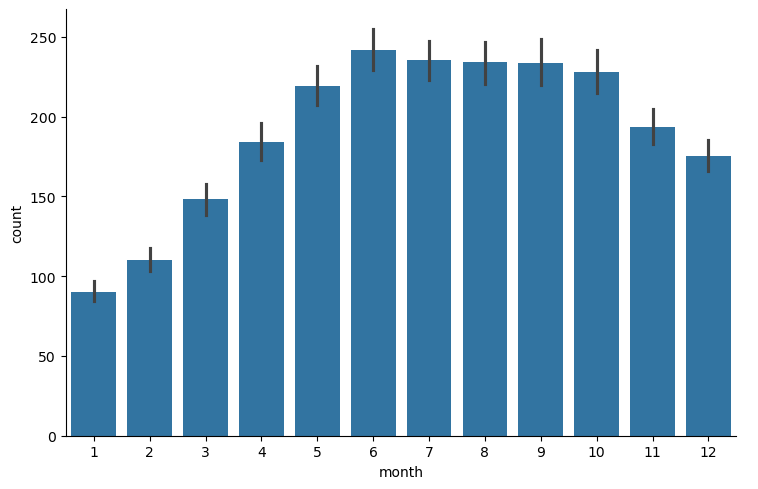

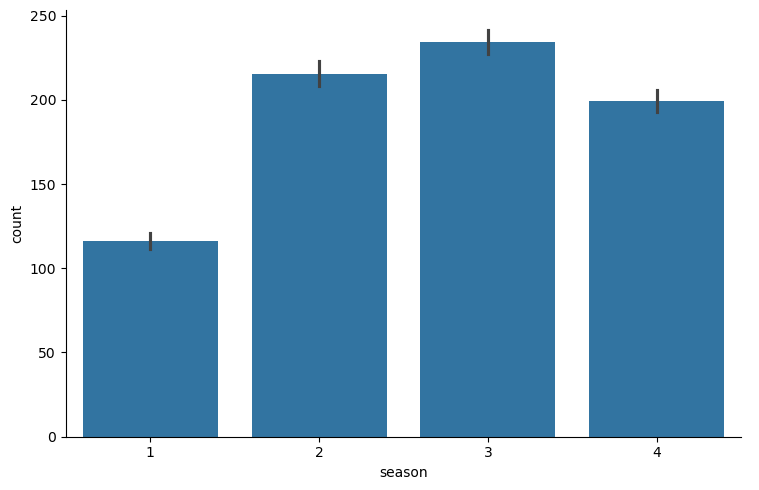

In [18]:
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5) 
sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

Observation on Bike Rental Counts by Month:

Month

Similar to the variation observed in bike rental counts by season, there is also variation at a slightly more granular level when considering the month feature.
Different months may exhibit different levels of bike rental activity due to factors such as changing weather patterns, seasonal events, and holidays.
Analyzing bike rental counts by month provides a finer level of detail compared to season, allowing for more nuanced insights into temporal patterns and trends. Understanding how rental activity fluctuates month by month can help bike sharing systems optimize resource allocation, adjust pricing strategies, and plan marketing campaigns to effectively meet user demand throughout the year.

## Step 5: Rerun the model with the same settings as before, just with more features

In [32]:
predictor_new_features = TabularPredictor(label='count', 
                                          problem_type= 'regression',
                                          eval_metric= 'root_mean_squared_error', 
                                          learner_kwargs={'ignored_columns': ['casual', 'registered']}).fit(
                                                                                           train_data = train,
                                                                                           time_limit= 600,
                                                                                           presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240510_121742"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240510_121742"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   22.33 GB / 26.83 GB (83.2%)
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Gener

[1000]	valid_set's rmse: 35.7814
[2000]	valid_set's rmse: 33.8949
[3000]	valid_set's rmse: 33.4593
[4000]	valid_set's rmse: 33.3827
[1000]	valid_set's rmse: 36.7509
[2000]	valid_set's rmse: 34.8073
[3000]	valid_set's rmse: 34.2167
[4000]	valid_set's rmse: 34.0012
[5000]	valid_set's rmse: 33.9229
[6000]	valid_set's rmse: 33.8539
[7000]	valid_set's rmse: 33.821
[8000]	valid_set's rmse: 33.8782
[9000]	valid_set's rmse: 33.888
[1000]	valid_set's rmse: 36.2764
[2000]	valid_set's rmse: 34.4293
[3000]	valid_set's rmse: 33.9592
[4000]	valid_set's rmse: 33.7595
[5000]	valid_set's rmse: 33.6295
[6000]	valid_set's rmse: 33.5812
[7000]	valid_set's rmse: 33.4975
[8000]	valid_set's rmse: 33.4739
[9000]	valid_set's rmse: 33.4279
[10000]	valid_set's rmse: 33.4099
[1000]	valid_set's rmse: 38.8013
[2000]	valid_set's rmse: 36.9592
[3000]	valid_set's rmse: 36.584
[4000]	valid_set's rmse: 36.4126
[5000]	valid_set's rmse: 36.3248
[6000]	valid_set's rmse: 36.3099
[1000]	valid_set's rmse: 38.0237
[2000]	valid

	-34.4573	 = Validation score   (-root_mean_squared_error)
	42.81s	 = Training   runtime
	4.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 348.04s of the 548.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.1807
[2000]	valid_set's rmse: 33.0157
[1000]	valid_set's rmse: 32.8606
[2000]	valid_set's rmse: 32.6361
[1000]	valid_set's rmse: 31.9551
[2000]	valid_set's rmse: 31.3427
[3000]	valid_set's rmse: 30.9071
[4000]	valid_set's rmse: 30.8642
[1000]	valid_set's rmse: 35.8651
[2000]	valid_set's rmse: 35.4992
[3000]	valid_set's rmse: 35.4249
[1000]	valid_set's rmse: 35.5385
[1000]	valid_set's rmse: 31.6267
[1000]	valid_set's rmse: 37.9271
[2000]	valid_set's rmse: 37.4486
[1000]	valid_set's rmse: 34.9425
[2000]	valid_set's rmse: 34.6699


	-33.9196	 = Validation score   (-root_mean_squared_error)
	15.54s	 = Training   runtime
	1.19s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 329.78s of the 529.76s of remaining time.
	-38.4543	 = Validation score   (-root_mean_squared_error)
	7.66s	 = Training   runtime
	0.54s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 321.2s of the 521.19s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4543.
	Ran out of time, early stopping on iteration 4792.
	Ran out of time, early stopping on iteration 4815.
	Ran out of time, early stopping on iteration 5075.
	Ran out of time, early stopping on iteration 5152.
	Ran out of time, early stopping on iteration 5362.
	Ran out of time, early stopping on iteration 5626.
	Ran out of time, early stopping on iteration 6397.
	-33.4063	 = Validation score   (-root_mean_squared

[1000]	valid_set's rmse: 29.8783
[1000]	valid_set's rmse: 30.5834


	-31.0274	 = Validation score   (-root_mean_squared_error)
	8.95s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 190.14s of the 190.13s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-30.6269	 = Validation score   (-root_mean_squared_error)
	6.85s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 182.92s of the 182.91s of remaining time.
	-31.5005	 = Validation score   (-root_mean_squared_error)
	20.47s	 = Training   runtime
	0.59s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 161.48s of the 161.47s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-30.4382	 = Validation score   (-root_mean_squared_error)
	71.86s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Tr

In [33]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.620463       7.121182  545.504783                0.000575           0.288770            3       True         17
1   NeuralNetFastAI_BAG_L2  -30.004617       6.833267  458.161416                0.216910          73.060971            2       True         15
2          CatBoost_BAG_L2  -30.438165       6.657939  456.961233                0.041582          71.860788            2       True         13
3          LightGBM_BAG_L2  -30.626912       6.751881  391.953104                0.135525           6.852659            2       True         11
4           XGBoost_BAG_L2  -30.914876       6.726591  393.441596                0.110234           8.341151            2       True         16
5        LightGBMXT_BAG_L2  -31.027383       6.920904  394.050579         

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.546199084

In [51]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head() 

0    16.993793
1    10.408390
2     9.816437
3    11.099516
4    10.986806
Name: count, dtype: float32

In [52]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0

In [53]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [54]:
# Same submitting predictions

submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 416kB/s]
Successfully submitted to Bike Sharing Demand

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.4775`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [57]:
import autogluon.core as ag
nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# hyperparameters of each model type
hyperparameters = {
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  
#number of hyperparameter optimization trial we are to perform
num_trials = 20    
#bayesian optimization
search_strategy = 'auto'  
scheduler = 'local'       

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ['casual','registered']}).fit(
                                                                         train_data=train, 
                                                                         time_limit=600,
                                                                         presets='best_quality', 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240510_131048"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240510_131048"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   20.95 GB / 26.83 GB (78.1%)
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Gener

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - 

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.1807
[2000]	valid_set's rmse: 33.0157
[1000]	valid_set's rmse: 32.8606
[2000]	valid_set's rmse: 32.6361
[1000]	valid_set's rmse: 31.9551
[2000]	valid_set's rmse: 31.3427
[3000]	valid_set's rmse: 30.9071
[4000]	valid_set's rmse: 30.8642
[1000]	valid_set's rmse: 35.8651
[2000]	valid_set's rmse: 35.4992
[3000]	valid_set's rmse: 35.4249
[1000]	valid_set's rmse: 35.5385
[1000]	valid_set's rmse: 31.6267
[1000]	valid_set's rmse: 37.9271
[2000]	valid_set's rmse: 37.4486
[1000]	valid_set's rmse: 34.9425
[2000]	valid_set's rmse: 34.6699


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 32.7949
[1000]	valid_set's rmse: 33.9555
[1000]	valid_set's rmse: 32.0149
[2000]	valid_set's rmse: 31.8907
[1000]	valid_set's rmse: 35.0464
[1000]	valid_set's rmse: 32.3115


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 32.9488
[1000]	valid_set's rmse: 32.5778
[2000]	valid_set's rmse: 32.4924
[1000]	valid_set's rmse: 32.8284
[2000]	valid_set's rmse: 32.3082
[3000]	valid_set's rmse: 32.2616
[4000]	valid_set's rmse: 32.2482
[1000]	valid_set's rmse: 35.2229
[1000]	valid_set's rmse: 35.6648
[1000]	valid_set's rmse: 30.8361
[1000]	valid_set's rmse: 37.5638
[1000]	valid_set's rmse: 34.0177


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 34.9539
[2000]	valid_set's rmse: 33.3209


	Ran out of time, early stopping on iteration 2460. Best iteration is:
	[2459]	valid_set's rmse: 33.0598
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.191
[1000]	valid_set's rmse: 31.768
[1000]	valid_set's rmse: 36.0321


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 881. Best iteration is:
	[847]	valid_set's rmse: 33.3913
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 830. Best iteration is:
	[677]	valid_set's rmse: 32.9957
	Ran out of time, early stopping on iteration 819. Best iteration is:
	[819]	valid_set's rmse: 32.2614
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 666. Best iteration is:
	[522]	valid_set's rmse: 33.9349
	Ran out of time, early stopping on iteration 647. Best iteration is:
	[645]	valid_set's rmse: 32.9159
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 266. Best iteration is:
	[266]	valid_set's rmse: 50.9942
	Fitting 8 child models (S1F1 

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Ran out of time, stopping training early. (Stopping on epoch 3)
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-117.7352	 = Validatio

[1000]	valid_set's rmse: 33.3834
[2000]	valid_set's rmse: 33.3703
[1000]	valid_set's rmse: 33.6397
[1000]	valid_set's rmse: 32.2789
[2000]	valid_set's rmse: 32.1842
[1000]	valid_set's rmse: 33.9869
[2000]	valid_set's rmse: 33.8377
[3000]	valid_set's rmse: 33.8331
[1000]	valid_set's rmse: 30.2679
[1000]	valid_set's rmse: 37.1897
[2000]	valid_set's rmse: 37.0966
[1000]	valid_set's rmse: 32.9764


	-33.5938	 = Validation score   (-root_mean_squared_error)
	29.08s	 = Training   runtime
	1.24s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 312.26s of remaining time.
	-32.7061	 = Validation score   (-root_mean_squared_error)
	0.36s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 4 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 70.17s of the 311.85s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 206. Best iteration is:
	[206]	valid_set's rmse: 40.2871
	Ran out of time,

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 710. Best iteration is:
	[708]	valid_set's rmse: 35.548
	Ran out of time, early stopping on iteration 716. Best iteration is:
	[716]	valid_set's rmse: 34.7123
	Ran out of time, early stopping on iteration 738. Best iteration is:
	[633]	valid_set's rmse: 30.4768
	Ran out of time, early stopping on iteration 752. Best iteration is:
	[750]	valid_set's rmse: 32.0527
	Ran out of time, early stopping on iteration 772. Best iteration is:
	[692]	valid_set's rmse: 30.4465
	Ran out of time, early stopping on iteration 807. Best iteration is:
	[676]	valid_set's rmse: 32.704
	Ran out of time, early stopping

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L2/T1 ...
	-34.9295	 = Validation score   (-root_mean_squared_error)
	12.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/T2 ...
	-35.125	 = Validation score   (-root_mean_squared_error)
	19.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/T3 ...
	-38.7541	 = Validation score   (-root_mean_squared_

In [58]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                            model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             WeightedEnsemble_L3  -32.501212       1.361431  422.892303                0.000673           0.334516            3       True         51
1             WeightedEnsemble_L2  -32.706099       1.242245   95.525891                0.000563           0.355631            2       True         31
2              LightGBM_BAG_L2/T1  -32.775941       1.244381  276.088204                0.000108           9.036351            2       True         42
3              LightGBM_BAG_L2/T4  -32.854931       1.244454  295.490946                0.000181          28.439092            2       True         45
4              LightGBM_BAG_L2/T3  -32.863781       1.244382  279.751006                0.000110          12.699153            2       True         44
5              LightGBM_BAG_L2/T

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T11': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T12': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T13': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T14': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T15': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T16': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T17': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T18': 'StackerEnsembleModel_LGB',
  'L

In [59]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    13.868725
1     7.184979
2     6.851097
3     6.957238
4     6.952941
Name: count, dtype: float32

In [60]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0

In [61]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [62]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [63]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 416kB/s]
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-10 13:24:37  new features with hyperparameters  complete  0.47758      0.47758       
submission_new_features.csv  2024-05-10 13:02:08  new features                       complete  0.71771      0.71771       
submission_new_features.csv  2024-05-10 12:54:54  new features                       error                                
submission.csv               2024-05-10 11:54:44  first raw submission               complete  1.81113      1.81113       


#### New Score of `0.4775`

In [19]:
import autogluon.core as ag
# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']
gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = { 
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }  

num_trials = 20            
search_strategy = 'auto'  
scheduler = 'local'       
hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                         }

predictor_new_hpo1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ['casual', 'registered']}).fit(
                                                                         train_data=train, 
                                                                         time_limit=600,
                                                                         presets='best_quality', 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240511_205849"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240511_205849"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri May 3 08:14:05 UTC 2024
Disk Space Avail:   18.02 GB / 26.83 GB (67.2%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Genera

  0%|          | 0/20 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray is required to train folds in parallel for TabularPredictor or HPO for MultiModalPredictor. A quick tip is to install via `pip install ray==2.6.3`
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrateg

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 35.0742
[1000]	valid_set's rmse: 34.1338
[2000]	valid_set's rmse: 33.9294
[1000]	valid_set's rmse: 34.257
[2000]	valid_set's rmse: 33.6373
[3000]	valid_set's rmse: 33.4395
[4000]	valid_set's rmse: 33.4325
[1000]	valid_set's rmse: 37.3575
[2000]	valid_set's rmse: 37.1945
[1000]	valid_set's rmse: 38.1734
[2000]	valid_set's rmse: 37.9207
[1000]	valid_set's rmse: 33.4459
[2000]	valid_set's rmse: 33.2585
[1000]	valid_set's rmse: 39.4999
[1000]	valid_set's rmse: 36.2444


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 38.8566


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 35.5817
[1000]	valid_set's rmse: 34.1995
[1000]	valid_set's rmse: 35.3549
[2000]	valid_set's rmse: 35.0222
[3000]	valid_set's rmse: 34.9265
[4000]	valid_set's rmse: 34.9494
[1000]	valid_set's rmse: 37.4727
[1000]	valid_set's rmse: 38.1211
[1000]	valid_set's rmse: 34.6989
[2000]	valid_set's rmse: 34.5578
[1000]	valid_set's rmse: 39.5984
[1000]	valid_set's rmse: 35.5718


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 36.4839
[2000]	valid_set's rmse: 34.7902


	Ran out of time, early stopping on iteration 2563. Best iteration is:
	[2559]	valid_set's rmse: 34.46
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 34.1089
[1000]	valid_set's rmse: 40.6595


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 964. Best iteration is:
	[928]	valid_set's rmse: 34.1863
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 945. Best iteration is:
	[685]	valid_set's rmse: 34.4501
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-35.7969	 = Validation score   (-root_mean_squared_error)
	13.51s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-35.4012	 = Validation score   (-root_mean_squared_error)
	9.62s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-36.2436	 = Validation score   (-root_mean_squared_error)
	17.42s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T5 ...
	-35.8048	 = Validation score   (-root_mean_squared_error)
	9.37s	 = Training   r

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - 

[1000]	valid_set's rmse: 34.2167
[1000]	valid_set's rmse: 32.6947
[1000]	valid_set's rmse: 38.9587
[1000]	valid_set's rmse: 34.3096


	-35.466	 = Validation score   (-root_mean_squared_error)
	14.8s	 = Training   runtime
	0.63s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 360.2s of remaining time.
	-34.3792	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.0s	 = Validation runtime
Excluded models: [] (Specified by `excluded_model_types`)
Fitting 5 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 64.76s of the 359.76s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 518. Best iteration is:
	[515]	valid_set's rmse: 38.1261
	Ran out of time, early stopping on iteration 524. Best iteration is:
	[253]	valid_set's rmse: 37.5835
	R

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 467. Best iteration is:
	[467]	valid_set's rmse: 39.0364
	Ran out of time, early stopping on iteration 471. Best iteration is:
	[471]	valid_set's rmse: 38.9867
	Ran out of time, early stopping on iteration 485. Best iteration is:
	[485]	valid_set's rmse: 34.4058
	Ran out of time, early stopping on iteration 498. Best iteration is:
	[498]	valid_set's rmse: 34.1352
	Ran out of time, early stopping on iteration 512. Best iteration is:
	[512]	valid_set's rmse: 31.682
	Ran out of time, early stopping on iteration 528. Best iteration is:
	[528]	valid_set's rmse: 35.6469
	Ran out of time, early stoppin

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-34.6744	 = Validation score   (-root_mean_squared_error)
	6.06s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-34.7948	 = Validation score   (-root_mean_squared_error)
	21.3s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T3 ...
	-35.2842	 = Validation score   (-root_mean_squared_error)
	27.46s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 64.76s of the 173.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-35.4176	 = Validation score   (-root_mean_sq

In [23]:
predictor = TabularPredictor.load("AutogluonModels/ag-20240511_205849")
print(predictor)

In [24]:
# Same thing as train and test dataset

submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()

0    12.239200
1     4.981489
2     4.020024
3     3.865564
4     3.780664
Name: count, dtype: float32

In [28]:
predictions_new_hpo1.describe()


count    6493.000000
mean      189.573563
std       174.410339
min         3.564802
25%        44.647964
50%       146.057678
75%       279.536011
max       887.620972
Name: count, dtype: float64

In [26]:
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [27]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                         model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L3 -34.342389       0.634720  272.707306                0.000623           0.343087            3       True         56
1          WeightedEnsemble_L2 -34.379231       0.629695   62.005467                0.000597           0.380354            2       True         37
2            XGBoost_BAG_L2/T1 -34.674426       0.633291  217.688095                0.000079           6.058383            2       True         52
3         ExtraTreesMSE_BAG_L2 -34.697078       0.633445  223.969538                0.000233          12.339827            2       True         51
4            XGBoost_BAG_L2/T2 -34.794849       0.633307  232.934157                0.000096          21.304446            2       True         53
5           LightGBM_BAG_L2/T1 -34.838139       0.633316

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T11': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T12': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T13': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T15': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T16': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_B

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

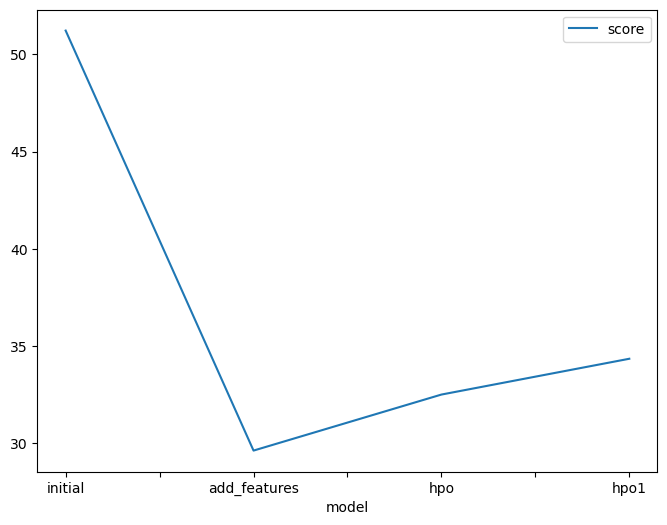

In [30]:
import pandas as pd
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo","hpo1"],
        "score": [51.218735, 29.620463,32.501212, 34.342389 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

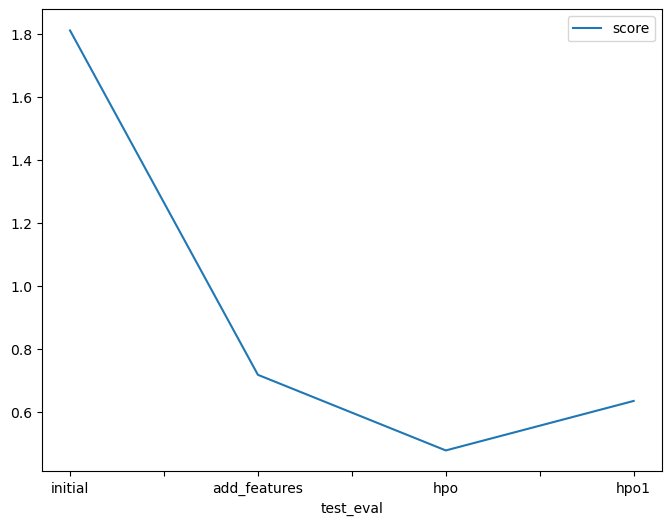

In [31]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1"],
        "score": [1.81113, 0.71771, 0.47758, 0.634720]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [34]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.81113, 0.71771, 0.47758]
})

,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),1.81113
1,add_features,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),0.71771
2,hpo (top-hpo-model: hpo),"Tree-Based Models: (GBM, XT, XGB & RF)",KNN,presets: 'optimize_for_deployment,0.47758


my best ranking model was WeightedEnsemble_L3 with validation RMSE score of 32.501212 and a kaggle score of 0.47758
